# BigGAN + CLIP + CMA-ES

[j.mp/bigclip](https://j.mp/bigclip)

By Eyal Gruss [@eyaler](https://twitter.com/eyaler) [eyalgruss.com](https://eyalgruss.com)

Based on SIREN+CLIP Colabs by: [@advadnoun](https://twitter.com/advadnoun), [@norod78](https://twitter.com/norod78)

Other CLIP notebooks: [OpenAI tutorial](https://colab.research.google.com/github/openai/clip/blob/master/Interacting_with_CLIP.ipynb), [SIREN by @advadnoun](https://colab.research.google.com/drive/1FoHdqoqKntliaQKnMoNs3yn5EALqWtvP), [SIREN by @norod78](https://colab.research.google.com/drive/1K1vfpTEvAmxW2rnhAaALRVyis8EiLOnD), [BigGAN by @advadnoun](https://colab.research.google.com/drive/1NCceX2mbiKOSlAd_o7IU7nA9UskKN5WR), [BigGAN by @eyaler](j.mp/bigclip), [BigGAN by @tg_bomze](https://colab.research.google.com/github/tg-bomze/collection-of-notebooks/blob/master/Text2Image_v2.ipynb), [BigGAN using big-sleep library by @lucidrains](https://colab.research.google.com/drive/1MEWKbm-driRNF8PrU7ogS5o3se-ePyPb), [BigGAN story hallucinator by @bonkerfield](https://colab.research.google.com/drive/1jF8pyZ7uaNYbk9ZiVdxTOajkp8kbmkLK), [StyleGAN2-ADA Anime by @nagolinc](https://colab.research.google.com/github/nagolinc/notebooks/blob/main/TADNE_and_CLIP.ipynb) [v2](https://colab.research.google.com/github/nagolinc/notebooks/blob/main/CLIP_%2B_TADNE_(pytorch)_v2.ipynb)

Using the works:

https://github.com/openai/CLIP

https://tfhub.dev/deepmind/biggan-deep-512

https://github.com/huggingface/pytorch-pretrained-BigGAN

http://www.aiartonline.com/design-2019/eyal-gruss (WanderGAN)

For a curated list of more online generative tools see: [j.mp/generativetools](https://j.mp/generativetools)


# 1. Setup

Install dependencies: (UPDATE: all of this is moved to the gitlab image)

In [18]:
# !nvidia-smi -L

# import subprocess

# CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
# print("CUDA version:", CUDA_version)

# if CUDA_version == "10.0":
#     torch_version_suffix = "+cu101"
# #     torch_version_suffix = "+cu100"
# elif CUDA_version == "10.1":
#     torch_version_suffix = "+cu101"
# elif CUDA_version == "10.2":
#     torch_version_suffix = ""
# else:
#     torch_version_suffix = "+cu110"

# !pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

In [19]:
# !pip install pytorch-pretrained-biggan
# !pip install nltk
# !pip install cma

In [20]:
# !sudo apt-get install -y ffmpeg

Install code repo for CLIP:

In [21]:
# !git clone --depth 1 https://github.com/openai/CLIP

Cloning into 'CLIP'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 0), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


Imports:

In [1]:
from pytorch_pretrained_biggan import BigGAN
last_gen_model = 'biggan-deep-512'
biggan_model = BigGAN.from_pretrained(last_gen_model).cuda().eval()

100%|██████████| 800/800 [00:00<00:00, 497029.06B/s]


In [2]:
cd CLIP

/home/jovyan/work/CLIP


In [3]:
import clip
last_clip_model = 'ViT-B/32'
perceptor, preprocess = clip.load(last_clip_model)

100%|███████████████████████| 353976522/353976522 [00:19<00:00, 17853585.76it/s]


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# 2. Config

In [5]:
outpath = "/home/jovyan/work/output/"
!rm -rf $outpath
!mkdir -p $outpath

In [6]:
# prompt = 'television buddha sculpture with grass'
# prompt = 'a buddha sculpture with television in the grass'
# prompt = 'buddha television grass'
# prompt = "a clean well-lighted place"
# prompt = "large bright white room fluorescent light"
prompt = "a large, bright, white room"
gen_model = 'biggan-deep' #@param ['biggan-deep', 'sigmoid']
size = '512' #@param [512, 256, 128] 
color = True #@param {type:'boolean'}
initial_class = 'Random mix' #@param ['From prompt', 'Random class', 'Random Dirichlet', 'Random mix', 'Random embeddings'] {allow-input: true}
optimize_class = True #@param {type:'boolean'}
class_smoothing = 0.1 #@param {type:'number'}
truncation = 1 #@param {type:'number'}
stochastic_truncation = False #@param {type:'boolean'}
optimizer = 'CMA-ES' #@param ['SGD','Adam','CMA-ES','CMA-ES+SGD','CMA-ES+Adam']
pop_size = 50 #@param {type:'integer'}
clip_model = 'ViT-B/32' #@param ['ViT-B/32','RN50']
augmentations =  64#@param {type:'integer'}
learning_rate =  0.1#@param {type:'number'}
standartization_loss =  0#@param {type:'number'}
minimum_entropy_loss = 0.0001 #@param {type:'number'}
embeddings_l2_loss = 0.0001 #@param {type:'number'}
total_variation_loss = 0.1 #@param {type:'number'}
iterations = 100 #@param {type:'integer'}
save_every = 1 #@param {type:'integer'}
fps = 1 #@param {type:'number'}
freeze_secs = 0 #@param {type:'number'}

# seed =  0#@param {type:'number'}
seed = 1

# 3. Generate

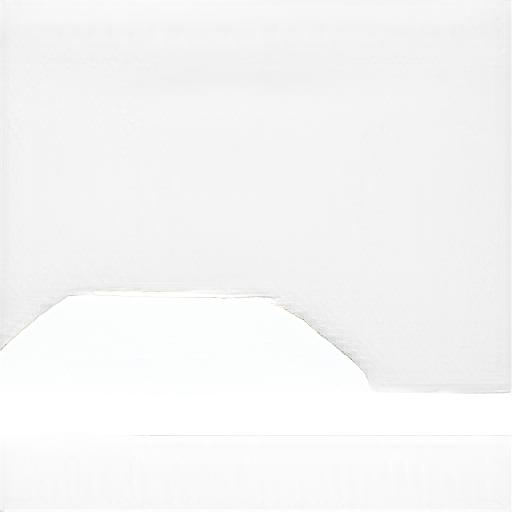

sample=99 iter=99 best: total=67.31 cos=67.31 reg=0.000 avg: total=68.76 cos=68.75 reg=0.009 std: total=0.89 cos=0.89 reg=0.002 1st=Indian_elephant(0.47) 2nd=microwave(0.41) 3rd=gondola(0.10) components: >=0.5:1, >=0.3:1, >=0.1:1
took: 521 secs (5.22 sec/iter) on GPU 0: GeForce RTX 2080 Ti (UUID: GPU-ddd28d43-f6d6-b109-02c9-a300fd6d3c47)


In [7]:
#@title Generate!
#@markdown 1. For **prompt** OpenAI suggest to use the template "A photo of a X." or "A photo of a X, a type of Y." [[paper]](https://cdn.openai.com/papers/Learning_Transferable_Visual_Models_From_Natural_Language_Supervision.pdf)
#@markdown 2. For **initial_class** you can either use free text or select a special option from the drop-down list.
#@markdown 3. Free text and 'From prompt' might fail to find an appropriate ImageNet class.
#@markdown 4. **seed**=0 means no seed.

if seed == 0:
  seed = None
noise_size = 128
class_size = 128 if initial_class.lower()=='random embeddings' else 1000
channels = 3 if color else 1
clip_res = perceptor.input_resolution.item()
gen_model = gen_model + '-' + size
sideX = sideY = int(size)
if sideX<=clip_res and sideY<=clip_res:
  augmentations = 1
if 'CMA' not in optimizer:
  pop_size = 1
if gen_model != last_gen_model and 'biggan' in gen_model:
  biggan_model = BigGAN.from_pretrained(gen_model).cuda().eval()
  last_gen_model = gen_model
if clip_model != last_clip_model:
  perceptor, preprocess = clip.load(clip_model)
  last_clip_model = clip_model
if 'sigmoid' in gen_model:
  optimize_class = False
emb_factor = 0.005

def my_forward(self, z, class_label, truncation):
  assert 0 < truncation <= 1

  if initial_class.lower()=='random embeddings':
    embed = class_label
  else:
    embed = self.embeddings(class_label)
    
  cond_vector = torch.cat((z, embed), dim=1)

  z = self.generator(cond_vector, truncation)
  return z

BigGAN.forward = my_forward


import numpy as np
state = None if not seed else np.random.RandomState(seed)
np.random.seed(seed)
import torch
import torchvision
import sys
torch.manual_seed(np.random.randint(sys.maxsize))
import imageio
from IPython.display import HTML, Image, clear_output
from scipy.stats import truncnorm, dirichlet
from pytorch_pretrained_biggan import BigGAN, convert_to_images, one_hot_from_names, utils
from nltk.corpus import wordnet as wn
from base64 import b64encode
from time import time
import cma
from cma.sigma_adaptation import CMAAdaptSigmaCSA, CMAAdaptSigmaTPA
import warnings
warnings.simplefilter("ignore", cma.evolution_strategy.InjectionWarning)

ind2name = {index: wn.of2ss('%08dn'%offset).lemma_names()[0] for offset, index in utils.IMAGENET.items()}

def save(out,name):
  with torch.no_grad():
    out = out.cpu().numpy()
  if 'sigmoid' in gen_model:
    out = out*2 - 1
  img = convert_to_images(out)[0]
  imageio.imwrite(name, np.asarray(img))

def checkin(i, best_ind, total_losses, losses, regs, out, probs=None):
  global sample_num
  name = outpath+'frame_%05d.jpg'%sample_num
  save(out, name)
  clear_output()
  display(Image(name))  
  stats = 'sample=%d iter=%d best: total=%.2f cos=%.2f reg=%.3f avg: total=%.2f cos=%.2f reg=%.3f std: total=%.2f cos=%.2f reg=%.3f'%(sample_num, i, total_losses[best_ind], losses[best_ind], regs[best_ind], np.mean(total_losses), np.mean(losses), np.mean(regs), np.std(total_losses), np.std(losses), np.std(regs))
  if probs is not None:
    best = probs[best_ind]
    inds = np.argsort(best)[::-1]
    probs = np.array(probs)
    stats += ' 1st=%s(%.2f) 2nd=%s(%.2f) 3rd=%s(%.2f) components: >=0.5:%.0f, >=0.3:%.0f, >=0.1:%.0f'%(ind2name[inds[0]], best[inds[0]], ind2name[inds[1]], best[inds[1]], ind2name[inds[2]], best[inds[2]], np.sum(probs >= 0.5)/pop_size,np.sum(probs >= 0.3)/pop_size,np.sum(probs >= 0.1)/pop_size)
  print(stats)
  sample_num += 1

eps = 1e-8
if 'sigmoid' in gen_model:
  noise_size = channels*sideY*sideX
  noise_vector = np.random.rand(pop_size, noise_size).astype(np.float32)
  noise_vector = np.log((noise_vector+eps)/(1-noise_vector+eps))
else:
  noise_vector = truncnorm.rvs(-2*truncation, 2*truncation, size=(pop_size, noise_size), random_state=state).astype(np.float32) #see https://github.com/tensorflow/hub/issues/214

  if initial_class.lower() == 'random class':
    class_vector = np.ones(shape=(pop_size, class_size), dtype=np.float32)*class_smoothing/999
    class_vector[0,np.random.randint(class_size)] = 1-class_smoothing
  elif initial_class.lower() == 'random dirichlet':
    class_vector = dirichlet.rvs([pop_size/class_size] * class_size, size=1, random_state=state).astype(np.float32)
  elif initial_class.lower() == 'random mix':
    class_vector = np.random.rand(pop_size, class_size).astype(np.float32)
  elif initial_class.lower() == 'random embeddings':
    class_vector = np.random.randn(pop_size, class_size).astype(np.float32)
  else:
    if initial_class.lower() == 'from prompt':
      initial_class = prompt
    try:
      class_vector = None
      class_vector = one_hot_from_names(initial_class, batch_size=pop_size)
      assert class_vector is not None
      class_vector = class_vector*(1-class_smoothing*class_size/(class_size-1))+class_smoothing/(class_size-1)
    except Exception as e:  
      print('Error: could not find initial_class. Try something else.')
      raise e

  if initial_class.lower() != 'random embeddings':
    class_vector = class_vector/np.sum(class_vector,axis=-1, keepdims=True)
    class_vector = np.log(class_vector+eps)
  initial_class_vector = class_vector[0]
  if initial_class.lower() == 'random mix':
    initial_class_vector = initial_class_vector*0-np.log(class_size)
  if initial_class.lower() == 'random embeddings':
    initial_class_vector = initial_class_vector*0
  class_vector = torch.tensor(class_vector, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')
  smoothed_ent = -torch.tensor(class_smoothing*np.log(class_smoothing/999+eps)+(1-class_smoothing)*np.log(1-class_smoothing+eps), dtype=torch.float32).cuda()
noise_vector = torch.tensor(noise_vector, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')

if 'SGD' in optimizer or 'Adam' in optimizer:
  params = [noise_vector]
  if optimize_class:
    params = params + [class_vector]
  if 'SGD' in optimizer:
    optim = torch.optim.SGD(params, lr=learning_rate, momentum=0.9)  
  else:
    optim = torch.optim.Adam(params, lr=learning_rate)

tx = clip.tokenize(prompt)
with torch.no_grad():
  target_clip = perceptor.encode_text(tx.cuda())

def get_output(noise_vector, class_vector):
  if stochastic_truncation:
    with torch.no_grad():
      trunc_indices = noise_vector.abs() > 2*truncation
      size = torch.count_nonzero(trunc_indices).cpu().numpy()
      trunc = truncnorm.rvs(-2*truncation, 2*truncation, size=(1,size)).astype(np.float32)
      noise_vector.data[trunc_indices] = torch.tensor(trunc, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')
  else:
    noise_vector = noise_vector.clamp(-2*truncation, 2*truncation)
  if initial_class.lower() == 'random embeddings':
    class_vector_norm = class_vector*emb_factor
  else:
    class_vector_norm = class_vector.softmax(dim=-1)
  return biggan_model(noise_vector, class_vector_norm, truncation), class_vector_norm

def ascend_txt(i, grad_step=False, show_save=False):
  prev_class_vector_norms = []
  regs = []
  losses = []
  total_losses = []
  best_loss = np.inf
  for j in range(pop_size):
    p_s = []
    if 'sigmoid' in gen_model:
      out = noise_vector[j:j+1].sigmoid().reshape(1, channels, sideY, sideX)
      prev_class_vector_norms = None
    else:
      out, class_vector_norm = get_output(noise_vector[j:j+1], class_vector[j:j+1])
      if channels==1:
        out = out.mean(dim=1, keepdim=True)
      if initial_class.lower() == 'random embeddings':
        prev_class_vector_norms = None
      else:
        with torch.no_grad():
          prev_class_vector_norms.append(class_vector_norm.cpu().numpy()[0])
    if channels==1:
      out = out.repeat(1,3,1,1)
    
    for aug in range(augmentations):
      if sideX<=clip_res and sideY<=clip_res:
        apper = out  
      else:
        size = torch.randint(int(.5*sideX), int(.98*sideX), ())
        #size = int(sideX*torch.zeros(1,).normal_(mean=.8, std=.3).clip(.5, .95))
        offsetx = torch.randint(0, sideX - size, ())
        offsety = torch.randint(0, sideX - size, ())
        apper = out[:, :, offsetx:offsetx + size, offsety:offsety + size]
        apper = (apper+1)/2
      apper = torch.nn.functional.interpolate(apper, clip_res, mode='bicubic')
      apper = apper.clamp(0,1)
      p_s.append(apper)
    into = nom(torch.cat(p_s, 0))
    predict_clip = perceptor.encode_image(into)
    factor = 100
    loss = factor*(1-torch.cosine_similarity(predict_clip, target_clip).mean())
    total_loss = loss
    if 'sigmoid' in gen_model and total_variation_loss or 'biggan' in gen_model and (standartization_loss or optimize_class and (initial_class.lower() != 'random embeddings' and minimum_entropy_loss or  initial_class.lower() == 'random embeddings' and embeddings_l2_loss)):
      reg = 0
      if 'sigmoid' in gen_model:
        if total_variation_loss:
          reg += total_variation_loss*((out[:, :, :-1, :] - out[:, :, 1:, :]).abs().mean() + (out[:, :, :, :-1] - out[:, :, :, 1:]).abs().mean())
      elif 'biggan' in gen_model:
        if minimum_entropy_loss and initial_class.lower() != 'random embeddings':
          reg += minimum_entropy_loss*((-class_vector_norm*torch.log(class_vector_norm+eps)).sum()-smoothed_ent).abs()
        elif embeddings_l2_loss and initial_class.lower() == 'random embeddings':
          reg += embeddings_l2_loss*class_vector_norm.square().sum()
        if standartization_loss: #https://arxiv.org/abs/1903.00925
          mu2 = noise_vector[j:j+1].mean().square()
          sigma2 = noise_vector[j:j+1].std().square()
          reg += standartization_loss*(mu2+sigma2-torch.log(sigma2))
      reg = factor*reg
      total_loss = total_loss + reg
      with torch.no_grad():
        regs.append(reg.item())
    else:
      regs.append(0)
    with torch.no_grad():
      losses.append(loss.item())
      total_losses.append(total_loss.item())
    if total_losses[-1]<best_loss:
      best_loss = total_losses[-1]
      best_ind = j
      best_out = out
    if grad_step:    
      optim.zero_grad()
      total_loss.backward()
      optim.step()
      
  if show_save and (i == iterations-1 or i % save_every == 0):
    if i==iterations-1:
      save(best_out,'%s.jpg'%prompt)  
    if i % save_every == 0:
      checkin(i, best_ind, total_losses, losses, regs, best_out, prev_class_vector_norms)  
  return total_losses

nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
if 'CMA' in optimizer:
  initial_vector = np.zeros(noise_size)
  bounds = None
  #if 'sigmoid' not in gen_model and not stochastic_truncation:
  #  bounds = [-2*truncation*np.ones(noise_size),2*truncation*np.ones(noise_size)]
  if optimize_class:
    initial_vector = np.hstack([initial_vector, initial_class_vector])
    #if not stochastic_truncation:
    #  bounds[0] = list(bounds[0]) + [None]*class_size
    #  bounds[1] = list(bounds[1]) + [None]*class_size
  cma_opts = {'popsize': pop_size, 'seed': np.nan, 'AdaptSigma': True, 'CMA_diagonal': True, 'CMA_active': False, 'CMA_elitist':False, 'bounds':bounds}
  cmaes = cma.CMAEvolutionStrategy(initial_vector, 1, inopts=cma_opts)

sample_num = 0
machine = !nvidia-smi -L
start = time()
for i in range(iterations):    
  if 'CMA' in optimizer:
    with torch.no_grad():
      cma_results = torch.tensor(cmaes.ask(), dtype=torch.float32).cuda()
      if optimize_class:
        noise_vector.data, class_vector.data = torch.split_with_sizes(cma_results, (noise_size, class_size), dim=-1)
        class_vector.data = class_vector.data
      else:
        noise_vector.data = cma_results      
  if 'SGD' in optimizer or 'Adam' in optimizer:
    losses = ascend_txt(i, grad_step=True, show_save='CMA' not in optimizer)
    assert noise_vector.requires_grad and noise_vector.is_leaf and (not optimize_class or class_vector.requires_grad and class_vector.is_leaf), (noise_vector.requires_grad, noise_vector.is_leaf, class_vector.requires_grad, class_vector.is_leaf)
  if 'CMA' in optimizer:
    with torch.no_grad():
      losses = ascend_txt(i, show_save=True)
      if optimize_class:
        vectors = torch.cat([noise_vector,class_vector], dim=1)
      else:
        vectors = noise_vector
      cmaes.tell(vectors.cpu().numpy(), losses)
  if i == iterations-1 or i % save_every == 0:
    print('took: %d secs (%.2f sec/iter) on %s'%(time()-start,(time()-start)/(i+1), machine[0]))

# from google.colab import files, output
# files.download('output/%s.jpg'%prompt)

# out = '"output/%s.mp4"'%prompt
# with open('output/list.txt','w') as f:
#   for i in range(sample_num):
#     f.write('file output/frame_%05d.jpg\n'%i)
#   for j in range(int(freeze_secs*fps)):
#     f.write('file output/frame_%05d.jpg\n'%i)
# !ffmpeg -r $fps -f concat -safe 0 -i /content/list.txt -c:v libx264 -pix_fmt yuv420p -profile:v baseline -movflags +faststart -r $fps $out -y
# with open('/%s.mp4'%prompt, 'rb') as f:
#   data_url = "data:video/mp4;base64," + b64encode(f.read()).decode()
# display(HTML("""
#   <video controls autoplay loop>
#         <source src="%s" type="video/mp4">
#   </video>""" % data_url))

# from google.colab import files, output
# output.eval_js('new Audio("https://freesound.org/data/previews/80/80921_1022651-lq.ogg").play()')
# files.download('output/%s.mp4'%prompt)

In [66]:
# save(out,'%s.jpg'%prompt.replace(" ", "_"))

# 4. Create Video

In [8]:
cd $outpath

/home/jovyan/work/output


In [9]:
pwd

'/home/jovyan/work/output'

In [10]:
# generate mp4
out = '%s.mp4'%prompt.replace(" ", "_")
with open('list.txt','w') as f:
  for i in range(sample_num):
    f.write('file frame_%05d.jpg\n'%i)
  for j in range(int(freeze_secs*fps)):
    f.write('file frame_%05d.jpg\n'%i)
!ffmpeg -r $fps -f concat -safe 0 -i list.txt -c:v libx264 -pix_fmt yuv420p -profile:v baseline -movflags +faststart -r $fps $out -y

# rename jpg
frame = 'frame_%05d.jpg'%(sample_num-1)
jpg = '%s.jpg'%prompt.replace(" ", "_")
!cp $frame $jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [11]:
# move to datestamped path
import os, datetime
newdir = outpath[:-1]+"_"+datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
!mv $outpath $newdir
!mkdir -p $outpath

In [61]:
from IPython.display import display, FileLink, FileLinks

local_file = FileLink(out.replace('"', ""), result_html_prefix="Click here to download: ")
# local_file = FileLinks(".", result_html_suffix="?download")
display(local_file)

/home/jovyan/work/output_20210201_022336/a_buddha_sculpture_with_television_in_the_grass.mp4

In [62]:
from IPython.display import HTML
local_file = out.replace('"', "")
HTML("<a href=\""+local_file+"\">download %s</a>"%local_file)